In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [146]:
df=pd.read_csv("Downloads/Car Details.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [147]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [148]:
df.shape

(4340, 8)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [150]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [151]:
duplicate_df=df[df.duplicated()]
duplicate_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [152]:
data=df.drop_duplicates()
data.shape

(3577, 8)

In [153]:
df=data

### Exploratory Data Analysis
- we can find out the hidden patternand insight in dataFrame.

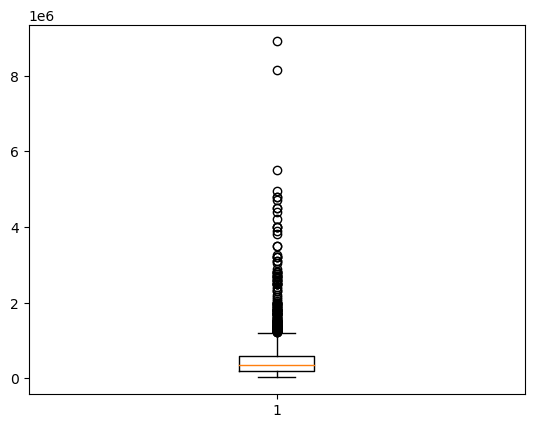

In [154]:
plt.boxplot(df['selling_price'])
plt.show()

#  Box plot for finding outliers :
### we can clearly see in box plot two values deviate more.Remove the identified outlier values from the dataset .

In [155]:
df['fuel']=df['fuel'].astype(str)

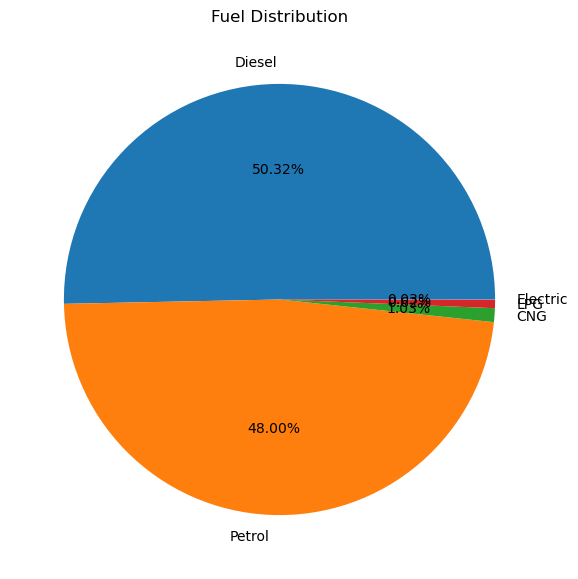

In [156]:
fuel_counts = df['fuel'].value_counts()


plt.figure(figsize=(8, 7))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%.2f%%')
plt.title('Fuel Distribution')
plt.show()

### Distribution of  fuel :-
- diesel and petrol is widely used fuel it is clearly seen in above pie chart.so we can make assumption and take a decision like 
- diesel car is most uses car .
- heavy vehicals generally used diesel so consumption of diesel fuel is high.

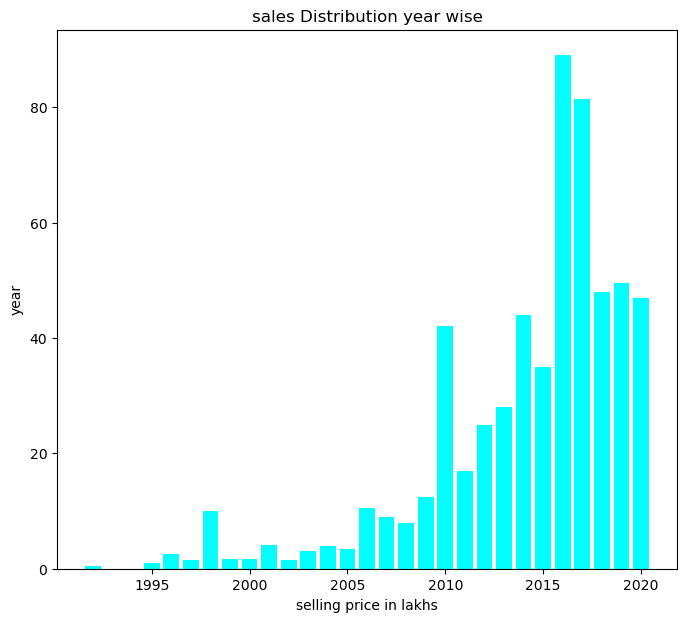

In [157]:
plt.figure(figsize=(8, 7))
plt.bar(df['year'],df['selling_price']/100000,color='cyan')
plt.xlabel('selling price in lakhs')
plt.ylabel('year')
plt.title('sales Distribution year wise')
plt.show()

### Selling price year wise 
- selling price is increasing high but in 2016 - 2017  very high we can see in bar plot.

In [158]:
counts = df['name'].value_counts()
filtered_counts = counts[counts > 10]
filtered_counts 

Maruti Swift Dzire VDI               54
Maruti Alto 800 LXI                  48
Maruti Alto LXi                      42
Maruti Alto LX                       30
Maruti Swift VDI BSIV                28
Hyundai EON Era Plus                 28
Maruti Wagon R VXI BS IV             26
Maruti Swift VDI                     23
Maruti Wagon R LXI Minor             21
Hyundai Santro Xing GLS              20
Maruti Alto K10 VXI                  20
Maruti 800 AC                        20
Maruti Ritz VDi                      19
Renault KWID RXT                     18
Hyundai EON Magna Plus               17
Mahindra XUV500 W8 2WD               16
Maruti Wagon R LXI                   15
Renault KWID 1.0 RXT Optional        14
Maruti Alto LXi BSIII                14
Chevrolet Beat Diesel LT             14
Tata Indica GLS BS IV                14
Ford Figo Diesel Titanium            14
Hyundai Verna 1.6 SX CRDi (O)        14
Maruti Alto 800 VXI                  13
Mahindra XUV500 W6 2WD               13


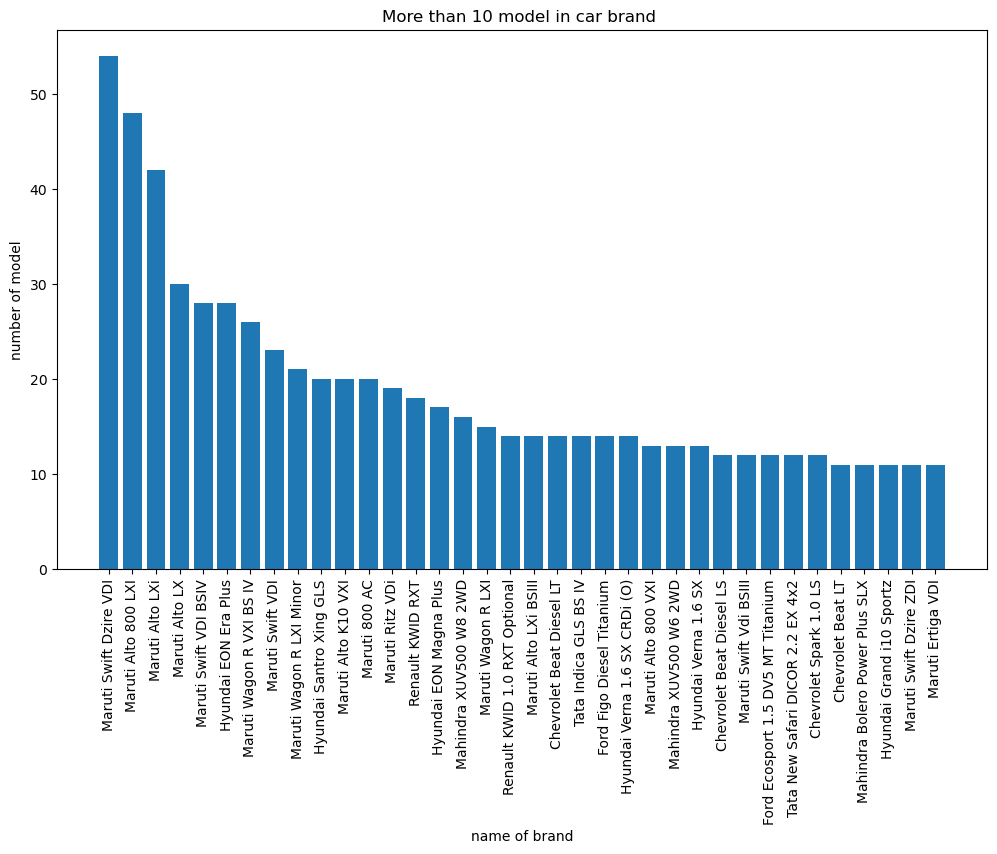

In [159]:
plt.figure(figsize=(12, 7))
plt.bar(filtered_counts .index,filtered_counts )
plt.xlabel('name of brand')
plt.ylabel('number of model')
plt.title('More than 10 model in car brand ')
plt.xticks(rotation=90)
plt.show()

### counting of same model car 
- in this bar chart we can see counting of same model car which have atleast 10 in count.

In [160]:
owner_df=df.groupby('owner')['selling_price'].sum()
owner_df

owner
First Owner             1254024922
Fourth & Above Owner      13590997
Second Owner             334431149
Test Drive Car            16222997
Third Owner               76915098
Name: selling_price, dtype: int64

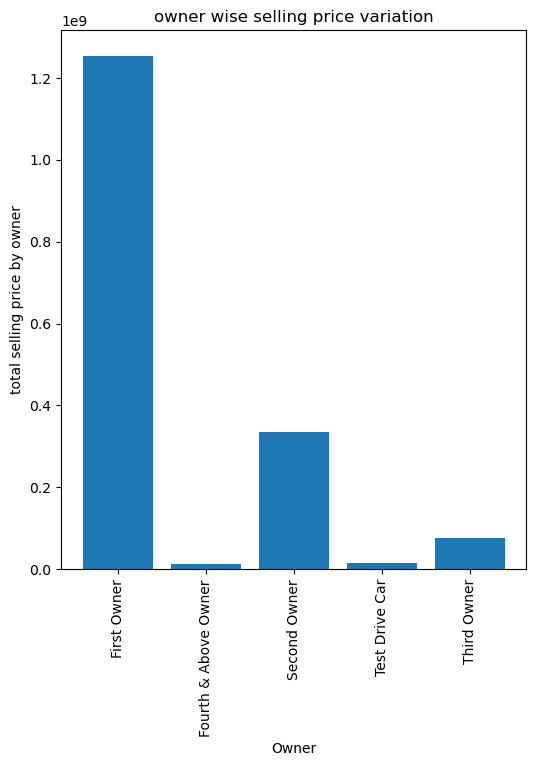

In [161]:
plt.figure(figsize=(6, 7))
plt.bar(owner_df.index,owner_df)
plt.xlabel('Owner')
plt.ylabel('total selling price by owner')
plt.title('owner wise selling price variation')
plt.xticks(rotation=90)
plt.show()

### Owner wise total sell price
- you can see owner wise price variation and take the deccesion according that for selling and buying .

In [162]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000
